*Part 2: Python for Data Analysis V*
# Plotting II#

In [1]:
!pip install pycodestyle
!pip install --index-url https://test.pypi.org/simple/ nbpep8
from nbpep8.nbpep8 import pep8

Looking in indexes: https://test.pypi.org/simple/


We already learned how to make different types of plots using `matplotlib.pyplot`. Python has a wide range of libraries to visualize data. Other popluar libraries incude ``seaborn``, ``plotly``, ``ggplot`` (transferred from R), ``bokeh``, ``altair`` and many more. With these libraries, you can do anything from maps over three-dimensional plots to interactive or animated plots. See here for an overview on the most common libraries:

* https://mode.com/blog/python-data-visualization-libraries/

In this tutorial we will show an example for some of these libraries so you get a feel of the pros and cons.
Furthermore, we will introduce you to the visualization of geo-coded data.

## Other libraries for plotting

We will show the example of a scatter plot for each of the libraries so you can see the differences in code and visuals.

### Seaborn

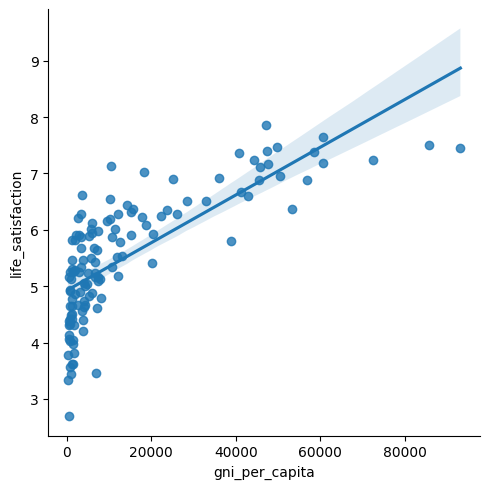

In [3]:
import seaborn as sns
import pandas as pd

# Load some data
satisfaction = pd.read_csv("http://farys.org/daten/life_satisfaction_clean.csv")

# Create a scatter plot with a regression line
sns.lmplot(x="gni_per_capita", y="life_satisfaction", data=satisfaction)


Pros:
* `seaborn` builds upon `matplotlib` but provides a lot of build-in functionality for common visualization tasks.
* More aesthetically pleasing by default

Cons:
* Less flexible


### Plotly



In [ ]:
import plotly.express as px
import pandas as pd

# Load some data
satisfaction = pd.read_csv("http://farys.org/daten/life_satisfaction_clean.csv")
satisfaction["sqrt_population"] = satisfaction["population"]**0.5

# Create an interactive scatter plot
fig = px.scatter(satisfaction,
                 x="gni_per_capita", y="life_satisfaction",
                 color="continent", size="sqrt_population",
                 hover_name="country")

# Show the plot
fig.show()

Pros:
* Designed for interactive plots
* provides functionality for interacting and exploring data
* Streaming real time data

Cons:
* For non-interactive visualization maybe not the best choice.

### Bokeh

In [ ]:
satisfaction.head()


country code  gni_per_capita  life_satisfaction  population  \
0  Afghanistan  AFG           600.0           2.694303  34414000.0   
1      Albania  ALB          4390.0           5.004403   2891000.0   
2      Algeria  DZA          4850.0           5.043086  39728000.0   
3    Argentina  ARG         12570.0           5.792797  43075000.0   
4      Armenia  ARM          4010.0           5.062449   2926000.0   

       continent  workhours         income_level  sqrt_population  
0           Asia        NaN           Low income      5866.344688  
1         Europe        NaN  Upper middle income      1700.294092  
2         Africa        NaN  Upper middle income      6303.015151  
3  South America  1691.5363          High income      6563.154729  
4           Asia        NaN  Lower middle income      1710.555465

In [ ]:
import pandas as pd
from bokeh.plotting import figure, output_notebook, show  # needed for colab/jupyter
from bokeh.transform import factor_cmap

# Load some data
satisfaction = pd.read_csv("http://farys.org/daten/life_satisfaction_clean.csv")

# Output the plot to the notebook
output_notebook()

# Create a Bokeh figure object
p = figure(title="Life satisfaction by income",
           x_axis_label="Income (GNI per capita)",
           y_axis_label="Life satisfaction",
           width=600, height=400)

# Create a color mapping for the "continent" column
colors = factor_cmap("continent",
                     palette=['#1f77b4', '#ff7f0e', '#2ca02c',
                              '#d62728', '#9467bd', '#8c564b'],
                     factors=satisfaction["continent"].unique())

# Add the data as circles to the figure
p.circle("gni_per_capita",
         "life_satisfaction",
         source=satisfaction,
         size=10, fill_color=colors, line_color=colors)

# Show the plot
show(p)


Pros:

* Designed for visualization in a web browser
* wide range of options
* streaming of real-time data

Cons:

* Not for non-interactive visualizations
* Not as much "out-of-the-box" as `plotly`.

### Altair

In [ ]:
import altair as alt
import pandas as pd

# Load some data
satisfaction = pd.read_csv("http://farys.org/daten/life_satisfaction_clean.csv")

# Enable Altair to render to notebook output
alt.renderers.enable("colab")

# Create an Altair scatter plot
mychart = alt.Chart(satisfaction).mark_circle().encode(
    x="gni_per_capita",
    y="life_satisfaction",
    color='continent',
    tooltip=['country', 'population']
).interactive()

mychart


alt.Chart(...)

Pros:

* works very well out-of-the-box even for complex plots.
* nice aesthetics
* Interactive

Cons:

* If you need to customize a lot, it might be more difficult.


<font color='teal'> **In-class exercise:**
Adapt the plotly example so it has log(GNI) on the x-axis.

Bonus: Can you find out, how to change the color palette to 'Dark2'? This might be helpful: https://plotly.com/python/discrete-color/</font>


## Creating maps with geopandas

Another type of data you may come across in your projects is **geospatial data**. Python has several libraries that allow you to work with and visualize spatial data. We will take a look at the **geopandas** library. It builds on top of pandas and will thus feel very familiar to you. In this tutorial, we will only cover the basics. If you want to learn more, check out this user guide:

* https://geopandas.org/docs/user_guide.html

If you are using the ``geopandas`` library for the first time, you have to install it first. Depending on your programming environment, you may also have to install some other libraries that will be used in the background (so-called dependencies). For our purpose, installing *geopandas* should be sufficient:


In [ ]:
!pip install geopandas

The geopandas library is commonly imported as **gpd**:

In [ ]:
import geopandas as gpd  # import as gpd

><font color = 4e1585> SIDENOTE: If you work with Anaconda, it is better to install geopandas with *conda* rather than *pip* (i.e.: ``conda install geopandas``)! See here for more information on installing geopandas and its dependencies: https://geopandas.org/getting_started/install.html.


### Importing SHP files and creating a geo-dataframe

Now we are ready to get started. Suppose we would like to create a map of the world where each country is colored according to its homicide rate. Let's import the homicide data:

In [ ]:
import pandas as pd
homicide = pd.read_csv("http://farys.org/daten/homicide.csv")
homicide.head(4)


country code  gni_per_capita  population      continent  top10_share  \
0        Aruba  ABW         26250.0    104000.0  North America          NaN   
1  Afghanistan  AFG           600.0  34414000.0           Asia          NaN   
2       Angola  AGO          4520.0  27884000.0         Africa          NaN   
3      Albania  ALB          4390.0   2891000.0         Europe         22.9   

   homicide  
0       NaN  
1  1.546670  
2  0.483067  
3  0.316194

Now we need to import the data we need to draw the map (i.e. the polygons for the country boundaries). Such data can be found in so-called **shapefiles** (``.shp``). There are many useful shapefiles that are freely available in the internet. We found [this shapefile](https://hub.arcgis.com/datasets/2b93b06dc0dc4e809d3c8db5cb96ba69_0?geometry=101.953%2C-89.382%2C-101.953%2C86.053) with the boundaries of all countries and downloaded it to the ``MyData`` folder on Drive:
* https://drive.google.com/drive/folders/1QnHTDQ0tb8_Ex6dMgNCwqJuL3PxzEKIv

If you check out the folder you will see that we do not only have the ``.shp`` file, but also a few other files containing additional information. We will only import the ``.shp`` file, but the other files will be used in the background (so don't delete them and don't change their names!):

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir("/content/drive/MyDrive/MyData")

Mounted at /content/drive



In [ ]:
gdf = gpd.read_file("countries_shp/World_Countries__Generalized_.shp")

In [ ]:
gdf.head(3)

FID                               COUNTRY ISO     COUNTRYAFF AFF_ISO  \
0    1                        American Samoa  AS  United States      US   
1    2  United States Minor Outlying Islands  UM  United States      US   
2    3                          Cook Islands  CK    New Zealand      NZ   

   SHAPE_Leng  SHAPE_Area                                           geometry  
0    0.600124    0.013720  POLYGON ((-170.74390 -14.37555, -170.74942 -14...  
1    0.480216    0.003216  MULTIPOLYGON (((-160.02114 -0.39805, -160.0281...  
2    0.980664    0.013073  MULTIPOLYGON (((-159.74698 -21.25667, -159.793...

In [ ]:
type(gdf)

geopandas.geodataframe.GeoDataFrame

This looks very much like a ``pandas`` dataframe! Indeed, all the things you can do with pandas dataframes work with geo-dataframes as well. Let's clean the dataframe:

In [ ]:
gdf.columns = [col.lower() for col in gdf.columns]
gdf = gdf[["country", "aff_iso", "geometry"]]
gdf.head(3)

country aff_iso  \
0                        American Samoa      US   
1  United States Minor Outlying Islands      US   
2                          Cook Islands      NZ   

                                            geometry  
0  POLYGON ((-170.74390 -14.37555, -170.74942 -14...  
1  MULTIPOLYGON (((-160.02114 -0.39805, -160.0281...  
2  MULTIPOLYGON (((-159.74698 -21.25667, -159.793...

How is this dataframe different from a normal ``pandas`` dataframe? The part that makes the difference is the ``geometry`` column that contains the geographic information.

In [ ]:
gdf.dtypes

country       object
aff_iso       object
geometry    geometry
dtype: object

Now we can draw a map using the polygons in the ``geometry`` column. This is done by applying the ``plot`` method to your geodataframe:

<Axes: >

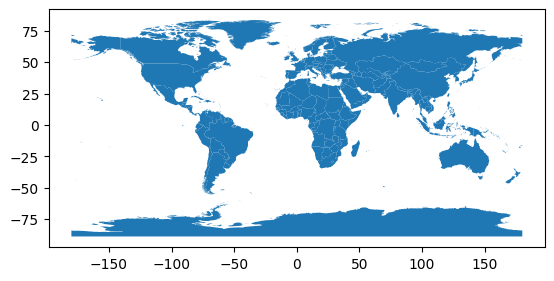

In [ ]:
gdf.plot()

This looks good, but Antartica takes up a lot of space on the map and is not relevant in our context. Let's drop it from our geodataframe:

Empty GeoDataFrame
Columns: [country, aff_iso, geometry]
Index: []


<Axes: >

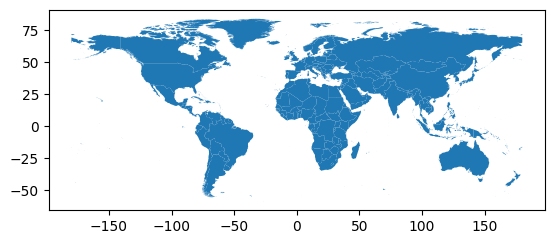

In [ ]:
print(gdf[gdf["country"] == "Antarctica"])
gdf = gdf.loc[gdf["country"] != "Antarctica"]
gdf.plot()

### Plotting data on a map

Now, how can we plot the homicide data? We will first have to merge the homicide information to our geodataframe. Unfortunately, we have a three-character code in the geodataframe and a two-character code in the homicide data. We could try to merge by country name, but this is usually not a good ideas as the countries may be spelled differently in the two datasets. So, let's first merge the three-character code to our geodataframe and then use this code to merge the geodata with the homicide data:

In [ ]:
gdf.head(1)  # Contains a 2-character code

country aff_iso                                           geometry
0  American Samoa      US  POLYGON ((-170.74390 -14.37555, -170.74942 -14...

In [ ]:
homicide.head(1)  # Contains a 3-character code

country code  gni_per_capita  population      continent  top10_share  \
0   Aruba  ABW         26250.0    104000.0  North America          NaN   

   homicide  
0       NaN

In [ ]:
# Import and clean a dataset that links 2-character and 3-character codes
codes = pd.read_csv("https://gist.githubusercontent.com/tadast/8827699/raw/f5cac3d42d16b78348610fc4ec301e9234f82821/countries_codes_and_coordinates.csv")
codes = codes[["Alpha-2 code", "Alpha-3 code"]]
codes["Alpha-2 code"] = codes["Alpha-2 code"].str.replace("\"", "").str.strip()
codes["Alpha-3 code"] = codes["Alpha-3 code"].str.replace("\"", "").str.strip()
codes.rename(columns={"Alpha-2 code": "code_2", "Alpha-3 code": "code_3"}, inplace=True)
print("Code dataset\n", codes.head(3))

# Merge 3-character codes to the geodataframe
gdf = gdf.merge(codes, left_on="aff_iso", right_on="code_2", how="left")

# Merge with homicide data
gdf = gdf.merge(homicide.drop(columns="country"), left_on="code_3",
                right_on="code", how="left", indicator=True)
gdf.drop(columns=["aff_iso", "code"], inplace=True)

# Inspect outcome
print("\nMerge values\n", gdf["_merge"].value_counts())
gdf.head(3)

Code dataset
   code_2 code_3
0     AF    AFG
1     AL    ALB
2     DZ    DZA

Merge values
 both          245
left_only      14
right_only      0
Name: _merge, dtype: int64
cell_content.py:2:80: E501 line too long (153 > 79 characters)
cell_content.py:6:80: E501 line too long (88 > 79 characters)



Now our geodataframe also contains the information about the homicide rates in each country. If we want to add this information to the plot, we can use the ``column`` argument:

In [ ]:
import numpy as np
gdf["log_homicide"] = np.log(gdf["homicide"])  # Take log of homicide

<Axes: >

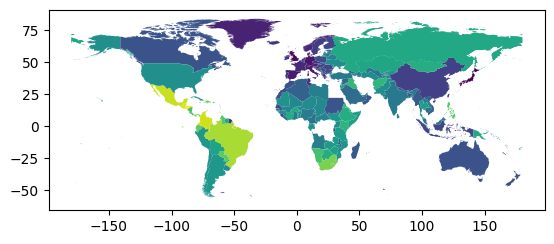

In [ ]:
gdf.plot(column="log_homicide")

There are many things you can customize to make your plot look better (see [here](https://geopandas.readthedocs.io/en/latest/docs/reference/api/geopandas.GeoDataFrame.plot.html) for the documentation). You can define the colormap (see [here](https://matplotlib.org/stable/tutorials/colors/colormaps.html)), the color and width of the edges, how missings should be colored, whether to add a legend and much more. Geopandas is nicely integrated with `matplotlib` so that we can use `matplotlib` to do some of these things:

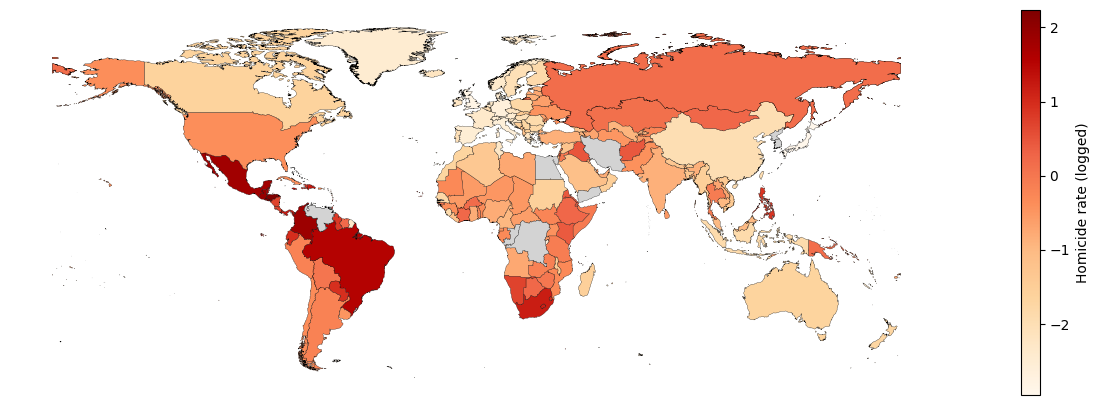

In [ ]:
import matplotlib.pyplot as plt

# Create figure
gdf.plot(column="log_homicide",
         cmap="OrRd",
         figsize=[20, 5],
         edgecolor="black",
         linewidth=0.2,
         legend=True,
         missing_kwds={"color": "lightgrey", "label": "Missing values"},
         legend_kwds={'label': "Homicide rate (logged)"})
plt.axis("off")

# Save figure to your computer
plt.savefig("homicide_map.png")

><font color = 4e1585> SIDENOTE 1:  We could also write it in an object-oriented style:
>
>```python
fig, ax = plt.subplots(figsize= (20, 5))
gdf.plot(ax=ax,
         cmap="OrRd",
         column="log_homicide",
         edgecolor="black",
         linewidth=0.2,
         legend=True,
         missing_kwds={ "color": "lightgrey", "label": "Missing values"},
         legend_kwds={'label': "Homicide rate (logged", 'orientation': "vertical"})
>
>ax.set_axis_off()
```



><font color = 4e1585> SIDENOTE 2:
>In some cases you may run into problems with the size or position of your colorbar. You can use the ``make_axes_locatable`` function to solve them:
>
>```python
># Import make_axes_locatable function
from mpl_toolkits.axes_grid1 import make_axes_locatable
>
># Define figure and axis object
fig, ax = plt.subplots(figsize= (15,8))
>
># Define size and position of colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.1)
>
># Make plot
gdf.plot(ax=ax,
         cmap="OrRd",
         column="log_homicide",
         edgecolor="black",
         linewidth= 0.2,
         legend = True,
         cax=cax,
         legend_kwds={'label': "Homicide rate (logged)"},
         missing_kwds={ "color": "lightgrey", "label": "Missing values"})
>
>ax.set_axis_off()
```

You can not only use geopandas to color shapes on a map, but also to **plot coordinate points on a map**. Let's look at an example:

In [ ]:
# Import geocoded data on all deadly terror attacks in 2019
terror = pd.read_csv("https://drive.google.com/uc?export=download&id=1-DdEQq_PTZgluMhOU6mpP1fDwBPfxDq8",
                     index_col=0)
terror.head(3)

city   latitude  longitude  nkill
0              Mandozai  31.499722  65.210278    5.0
1  Dashti Qala district  37.206005  69.477179    5.0
2         Hanjan Payeen  33.873747  74.868352    1.0

In [ ]:
# Create a geodataframe
terror = gpd.GeoDataFrame(terror,
                          geometry=gpd.points_from_xy(terror["longitude"],
                                                      terror["latitude"]))
terror.head(3)

city   latitude  longitude  nkill  \
0              Mandozai  31.499722  65.210278    5.0   
1  Dashti Qala district  37.206005  69.477179    5.0   
2         Hanjan Payeen  33.873747  74.868352    1.0   

                    geometry  
0  POINT (65.21028 31.49972)  
1  POINT (69.47718 37.20600)  
2  POINT (74.86835 33.87375)

As you can see, the ``geometry`` column of our geodataset now contains points rather than polygons. If we want to plot the points on top of our map, we can first assign the plot of the map to a variable (see SIDENOTE on object-oriented plotting above) and then pass this plot as an argument to the plot of the terror attacks:

<Axes: >

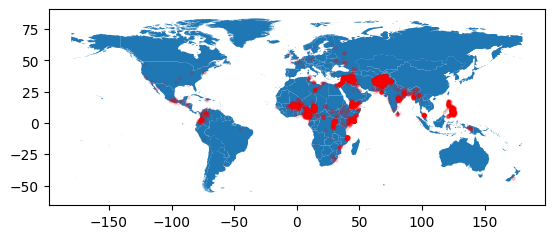

In [ ]:
ax = gdf.plot()
terror.plot(ax=ax, color="red", markersize=5, alpha=0.1)

For each terror attack, a point was added to our map. Once again, there are countless things we can customize. For example, we could make the markersize proportional to the number of people that were killed:

(-197.99998739509996, 197.9999873951001, -65.60471949799998, 90.72971062200006)

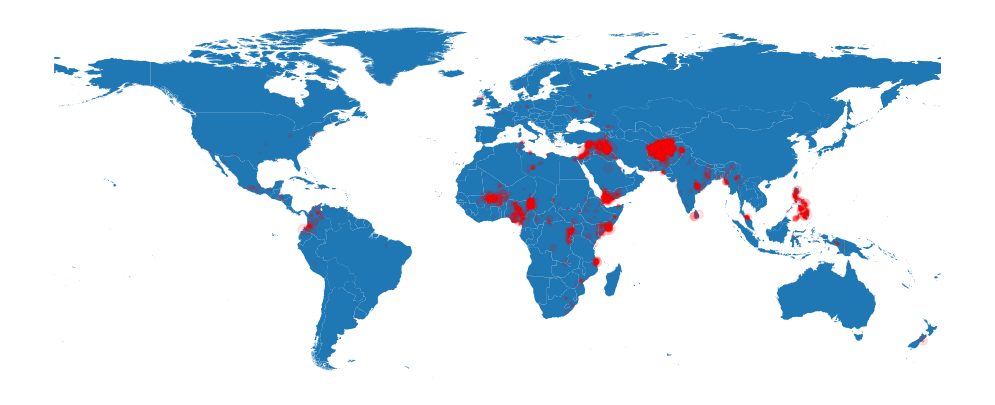

In [ ]:
ax = gdf.plot(figsize=(15, 5))
terror.plot(ax=ax, color="red", markersize=terror["nkill"], alpha=0.1)
plt.axis("off")

We can also **zoom in** to a particular region by setting limits for the x and the y axes. Let's take a closer look at Afghanistan:

(55.0, 80.0, 24.0, 40.0)

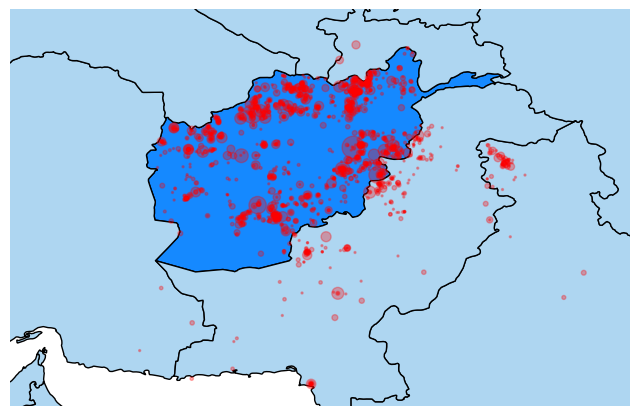

In [ ]:
# Make color column to color Afghanistan differently on the map
afg = gdf["code_3"] == "AFG"
afg = afg.map({False: "#AED6F1", True: "#1589FF"})  # set colors

# Plot map and terror attacks
ax = gdf.plot(figsize=(8, 10), color=afg, edgecolor="black")
terror.plot(ax=ax, color="red", markersize=terror["nkill"]*2, alpha=0.3)

# Set limits for the x and the y axes:
ax.set_ylim(24, 40)
ax.set_xlim(55, 80)

# Turn plot ayes off
plt.axis("off")

---
<font color='teal'> **In-class exercise**: Your ``gdf`` geodataframe also contains a column with the income share of the top decile in each country. Can you plot this information on a map of the world? Customize your map to make it look nice and understandable.

<font color='teal'> Create a map that zooms into Europe and shows the terror attacks happening here. Change the color of the background map (fill: grey, edges: black)

---

### Managing projections

According to what most (though not all, as you may know: https://youtu.be/QvzgaHCnwqo ;-)) people believe, the earth is not flat but a sphere. This means that there are different ways of projecting points or other shapes from the three-dimensional space onto the two-dimensional maps we are creating. Some of these projections are optimized for representing shapes, others for areas and still other for distances (while none can be good at everything).  When we import a shapefile, it already comes with a projection. We can **access the projection of a geodataframe through its ``crs`` (coordinate reference system) attribute**:

In [ ]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

We can see that the "EPSG:4326" projection was used (see here for more information on this projection: https://epsg.io/4326). If we want **to change the projection, we can use the ``to_crs`` method**:


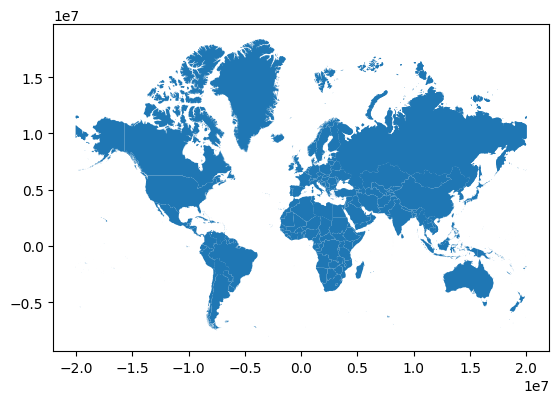

In [ ]:
gdf = gdf.to_crs("EPSG:3395")  # change to Mercator projection
gdf.plot()

As you can see, the map now looks a bit different. Let's try to plot the terror attacks on top of it:

<Axes: >

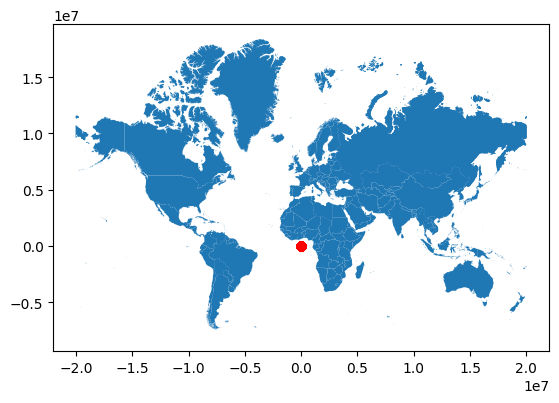

In [ ]:
ax = gdf.plot()
terror.plot(ax=ax, color="red")

Why didn't this work? The two geodataframes use different projections and the values are thus not on the same scale ("EPSG:4326" is in degrees and "EPSG:3395" in meters). Thus, we must change the projection for the ``terror`` dataframe as well:

In [ ]:
terror = terror.set_crs("EPSG:4326")  # Specify original crs (if not already specified)
terror = terror.to_crs("EPSG:3395")  # Specify new crs

ValueError: ignored

<Axes: >

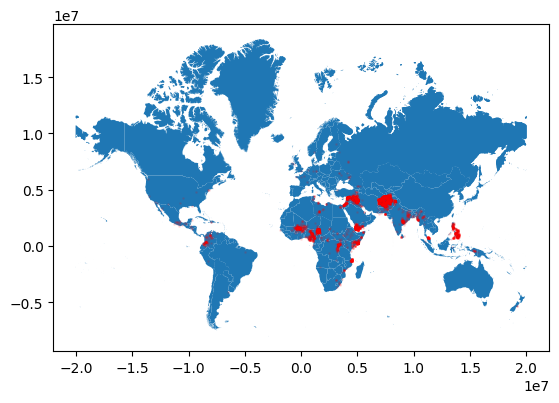

In [ ]:
ax = gdf.plot()
terror.plot(ax=ax, color='red', alpha=0.1, markersize=1)

><font color = 4e1585> SIDENOTE: It is usually better to set the projection right away (when you create the geodataframe from data that comes without it):
>
>
>```python
terror = pd.read_csv("terror2019.csv", index_col=0)
terror = gpd.GeoDataFrame(terror, geometry=gpd.points_from_xy(terror["longitude"],terror["latitude"]),
                          crs="EPSG:4326")
```
>
><font color = 4e1585>If you want to learn more about projections in geopandas, see:
* https://geopandas.org/docs/user_guide/projections.html



### Adding a base map

We can also plot data on sophisticated maps with more features than just country borders. A few such maps are freely available and can be imported into Python using the contextily library: https://contextily.readthedocs.io/en/latest/

In [ ]:
!pip install contextily

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 66.8 MB/s eta 0:00:00


In [ ]:
import contextily as cx

Before we can add a basemap to our plot, we need to make sure that the projections match. Per default, contextily uses a Spherical Mercator projection (EPSG:3857). Let's change the projection of our terror data:

In [ ]:
terror = terror.to_crs(epsg=3857)

Now we can add a basemap using the ``add_basemap`` function of the contextily module:

(-15270565.326566167, 20864314.07918277, -6117891.691175087, 9819914.850930065)

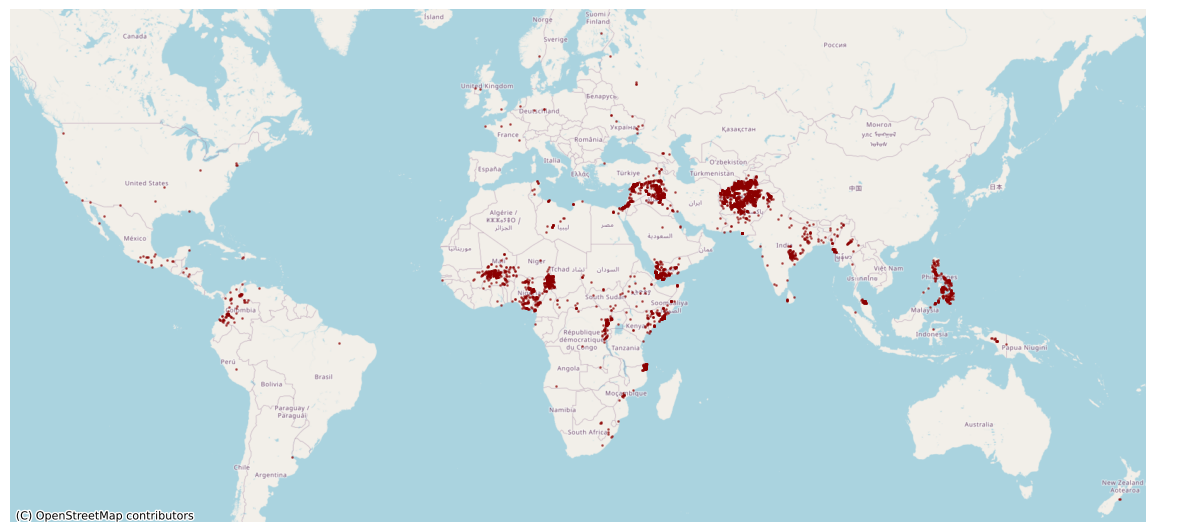

In [ ]:
fig, ax = plt.subplots(figsize=(15, 7))
terror.plot(alpha=0.5, ax=ax, color="darkred", markersize=1)
cx.add_basemap(ax, source=cx.providers.OpenStreetMap.Mapnik)  # Could also specify crs of your data here
plt.axis("off")

There are different map providers we can choose from:

In [ ]:
cx.providers

{'OpenStreetMap': {'Mapnik': {'url': 'https://tile.openstreetmap.org/{z}/{x}/{y}.png',
   'max_zoom': 19,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap contributors',
   'name': 'OpenStreetMap.Mapnik'},
  'DE': {'url': 'https://tile.openstreetmap.de/{z}/{x}/{y}.png',
   'max_zoom': 18,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap contributors',
   'name': 'OpenStreetMap.DE'},
  'CH': {'url': 'https://tile.osm.ch/switzerland/{z}/{x}/{y}.png',
   'max_zoom': 18,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap contributors',
   'bounds': [[45, 5], [48, 11]],
   'name': 'OpenStreetMap.CH'},
  'France': {'url': 'https://{s}.tile.openstreetmap.fr/osmfr/{z}/{x}/{y}.png',
   'max_zoom': 20,
   'html_attribution': '&copy; OpenStreetMap France | &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap France | (C) OpenStreetMap contributors',
   'name': 'OpenStreetMap.France'},
  'HOT': {'url': 'https://{s}.tile.openstreetmap.fr/hot/{z}/{x}/{y}.png',
   'max_zoom': 19,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors, Tiles style by <a href="https://www.hotosm.org/" target="_blank">Humanitarian OpenStreetMap Team</a> hosted by <a href="https://openstreetmap.fr/" target="_blank">OpenStreetMap France</a>',
   'attribution': '(C) OpenStreetMap contributors, Tiles style by Humanitarian OpenStreetMap Team hosted by OpenStreetMap France',
   'name': 'OpenStreetMap.HOT'},
  'BZH': {'url': 'https://tile.openstreetmap.bzh/br/{z}/{x}/{y}.png',
   'max_zoom': 19,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors, Tiles courtesy of <a href="http://www.openstreetmap.bzh/" target="_blank">Breton OpenStreetMap Team</a>',
   'attribution': '(C) OpenStreetMap contributors, Tiles courtesy of Breton OpenStreetMap Team',
   'bounds': [[46.2, -5.5], [50, 0.7]],
   'name': 'OpenStreetMap.BZH'},
  'BlackAndWhite': {'url': 'http://{s}.tiles.wmflabs.org/bw-mapnik/{z}/{x}/{y}.png',
   'max_zoom': 18,
   'attribution': '(C) OpenStreetMap contributors',
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'name': 'OpenStreetMap.BlackAndWhite'}},
 'MapTilesAPI': {'OSMEnglish': {'url': 'https://maptiles.p.rapidapi.com/{variant}/{z}/{x}/{y}.png?rapidapi-key={apikey}',
   'html_attribution': '&copy; <a href="http://www.maptilesapi.com/">MapTiles API</a>, &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) MapTiles API, (C) OpenStreetMap contributors',
   'variant': 'en/map/v1',
   'apikey': '<insert your api key here>',
   'max_zoom': 19,
   'name': 'MapTilesAPI.OSMEnglish'},
  'OSMFrancais': {'url': 'https://maptiles.p.rapidapi.com/{variant}/{z}/{x}/{y}.png?rapidapi-key={apikey}',
   'html_attribution': '&copy; <a href="http://www.maptilesapi.com/">MapTiles API</a>, &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) MapTiles API, (C) OpenStreetMap contributors',
   'variant': 'fr/map/v1',
   'apikey': '<insert your api key here>',
   'max_zoom': 19,
   'name': 'MapTilesAPI.OSMFrancais'},
  'OSMEspagnol': {'url': 'https://maptiles.p.rapidapi.com/{variant}/{z}/{x}/{y}.png?rapidapi-key={apikey}',
   'html_attribution': '&copy; <a href="http://www.maptilesapi.com/">MapTiles API</a>, &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) MapTiles API, (C) OpenStreetMap contributors',
   'variant': 'es/map/v1',
   'apikey': '<insert 

This is the map we used for the plot above:

In [ ]:
cx.providers.OpenStreetMap.Mapnik

{'url': 'https://tile.openstreetmap.org/{z}/{x}/{y}.png',
 'max_zoom': 19,
 'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
 'attribution': '(C) OpenStreetMap contributors',
 'name': 'OpenStreetMap.Mapnik'}

Let's try with another one:

In [ ]:
cx.providers.Esri.NatGeoWorldMap

{'url': 'https://server.arcgisonline.com/ArcGIS/rest/services/{variant}/MapServer/tile/{z}/{y}/{x}',
 'variant': 'NatGeo_World_Map',
 'html_attribution': 'Tiles &copy; Esri &mdash; National Geographic, Esri, DeLorme, NAVTEQ, UNEP-WCMC, USGS, NASA, ESA, METI, NRCAN, GEBCO, NOAA, iPC',
 'attribution': 'Tiles (C) Esri -- National Geographic, Esri, DeLorme, NAVTEQ, UNEP-WCMC, USGS, NASA, ESA, METI, NRCAN, GEBCO, NOAA, iPC',
 'max_zoom': 16,
 'name': 'Esri.NatGeoWorldMap'}

cell_content.py:3:80: E501 line too long (134 > 79 characters)



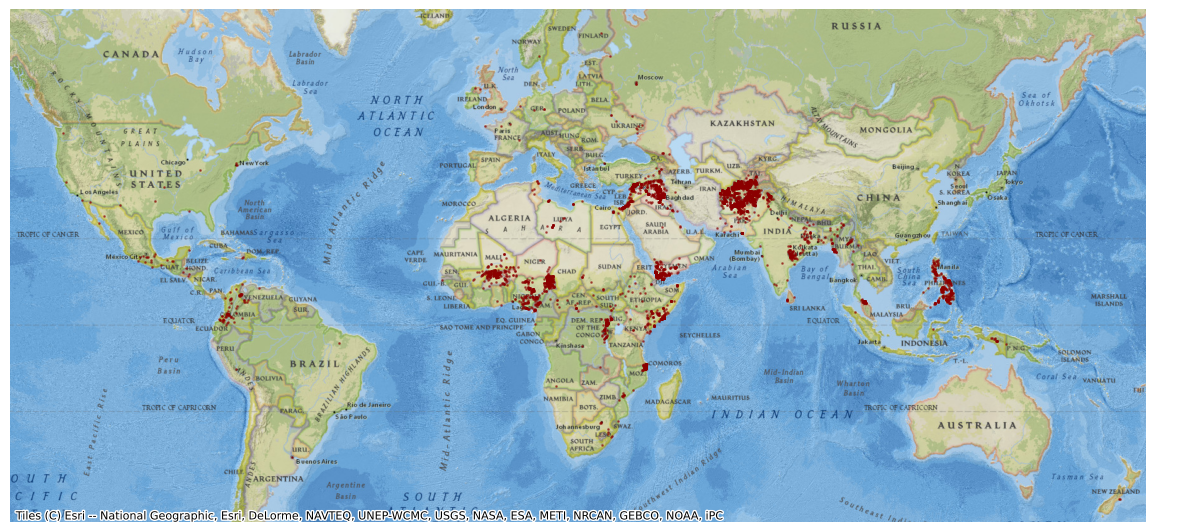

In [ ]:
fig, ax = plt.subplots(figsize=(15, 7))
terror.plot(alpha=0.5, ax=ax, color="darkred", markersize=1)
cx.add_basemap(ax, source=cx.providers.Esri.NatGeoWorldMap)  # We could also specify the projection of our data here (crs="EPSG:3395")
plt.axis("off")

### Saving spatial data to a shapefile

You would like to **export your geodataframe to your computer** so that you can continue to use it later on. How could you do this? If you export it to a csv, it will loose its geographic properties (e.g. the projection). For this reason, it is better to export it **as a shapefile**. This can be done as follows:

In [ ]:
if not os.path.exists("terror_shp"):
    os.makedirs("terror_shp")  # make a folder within our current directory

In [ ]:
terror.to_file("terror_shp/terror.shp")  # create the shapefile

If you check out the folder, you will see that a bunch of files were created. You can read in the shapefile as we did above:

In [ ]:
test = gpd.read_file("terror_shp/terror.shp")

In [ ]:
test.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich



---



>  <font color='teal'> **In-class exercise**: Plot the inequality measure in ``gdf`` on top of the WorldTerrain map from Esri.